## Observations and Insights 

1. We can tell from the data set that there is a strong correlation between weight and average tumor volume for the mice treated with Capomulin.

2. Similar measures were used to acquire data -- the number of male and female mice were nearly identical, the amount of mice in each group were about 24 or 25 across treatment regimens, etc.

3. Capomulin and Ramicane had the smallest average tumor size amongst the regimens.  We could say that these treatments seem to be more effective in treating tumors.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on=("Mouse ID", "Mouse ID"), how="left")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_groups= combined_mouse_data.groupby("Mouse ID")["Timepoint"].value_counts()
combined_groups= pd.DataFrame(mouse_groups)

dups= combined_groups.loc[combined_groups["Timepoint"]>1, :]
dups


Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse1= combined_mouse_data.loc[combined_mouse_data["Mouse ID"]== "g989", :]
dup_mouse1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data=combined_mouse_data.loc[combined_mouse_data["Mouse ID"]!= "g989"]
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_data["Mouse ID"].value_counts()
len(clean_mouse_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import statistics as stats
import numpy as np
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Create intial summary data frame
summarydf = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen").count())

# Mean
summarydf["Mean"] = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

# Median
summarydf["Median"]= pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

# Variance
summarydf["Variance"] = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

# Standard Deviation
summarydf["Standard Deviation (std)"] = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

# SEM
summarydf["Standard Error of Mean (SEM)"] = pd.DataFrame(clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Add Number of Mice Tested to data frame
summarydf = summarydf[["Mouse ID", "Mean", "Median", "Standard Deviation (std)", "Variance", "Standard Error of Mean (SEM)"]]

# Rename "Mouse ID" to "Trials"
summarydf = summarydf.rename(columns = {"Mouse ID" : "Trials"})
          
summarydf

,Trials,Mean,Median,Standard Deviation (std),Variance,Standard Error of Mean (SEM)
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,148,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
sum_df_gb= clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": [
    "count", "mean", "median", "var", "std", "sem"
]})
sum_df_gb= pd.DataFrame(sum_df_gb)

sum_df_gb

Tumor Volume (mm3)                                             \
                          count       mean     median        var       std   
Drug Regimen                                                                 
Capomulin                   230  40.675741  41.557809  24.947764  4.994774   
Ceftamin                    178  52.591172  51.776157  39.290177  6.268188   
Infubinol                   178  52.884795  51.820584  43.128684  6.567243   
Ketapril                    188  55.235638  53.698743  68.553577  8.279709   
Naftisol                    186  54.331565  52.509285  66.173479  8.134708   
Placebo                     181  54.033581  52.288934  61.168083  7.821003   
Propriva                    148  52.320930  50.446266  43.852013  6.622085   
Ramicane                    228  40.216745  40.673236  23.486704  4.846308   
Stelasyn                    181  54.233149  52.431737  59.450562  7.710419   
Zoniferol                   182  53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Mice')

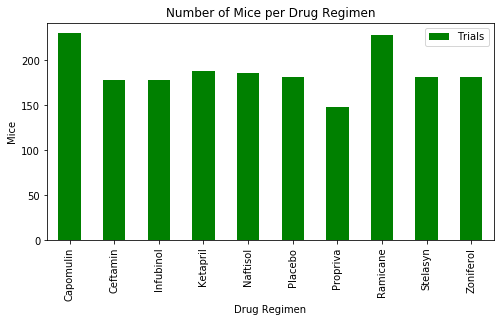

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
dr_trials= summarydf["Trials"]
dr_trials= pd.DataFrame(dr_trials)

dr_trials.plot(kind="bar", color="g", figsize=(8,4))
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Mice")

Text(0, 0.5, 'Mice')

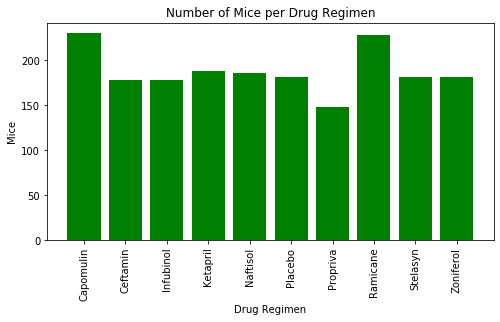

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis= np.arange(len(dr_trials))
tick_locations= [value for value in x_axis]

plt.figure(figsize=(8,4))
plt.bar(x_axis, dr_trials["Trials"], color="g", align="center")
plt.xticks(tick_locations, dr_trials.index.values, rotation=90)
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

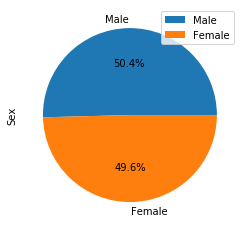

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_total=clean_mouse_data.groupby("Mouse ID")["Sex"].unique()

# Extra steps to remove brackets from [Male] and [Female]
gender_total= pd.DataFrame(gender_total)
gender_total["Sex"]= gender_total["Sex"].map(lambda x: x[0])
gender_total= gender_total["Sex"]
gender_total= gender_total.value_counts()
gender_total= pd.DataFrame(gender_total)



gender_pie=gender_total.plot.pie(y="Sex", autopct='%1.1f%%')

Text(0.5, 1.0, 'Gender Demographic Within Study')

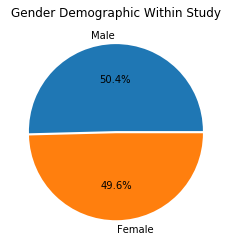

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_total

explode=(0, .025)
colors= ("tab:blue", "tab:orange")
plt.pie(gender_total["Sex"], labels= gender_total.index.values, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title("Gender Demographic Within Study")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint and drug regimen for each mouse
final_tumor_tp=clean_mouse_data.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
final_dr= clean_mouse_data.groupby("Mouse ID")["Drug Regimen"].last()

# Create new data frame for last (greatest) timepoint and drug regimen
combined_tp_dr = pd.DataFrame({"Final Tumor Volume (mm3)": final_tumor_tp, "Drug Regimen": final_dr})

# Narrow down to 4 specific treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
combined_tp_dr.loc[(combined_tp_dr["Drug Regimen"]=="Capomulin") | (combined_tp_dr["Drug Regimen"]=="Ramicane") |  (combined_tp_dr["Drug Regimen"]=="Infubinol") | (combined_tp_dr["Drug Regimen"]=="Ceftamin")]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Final Tumor Volume (mm3),Drug Regimen
Mouse ID,,
a203,67.973419,Infubinol
a251,65.525743,Infubinol
a275,62.999356,Ceftamin
a411,38.407618,Ramicane
a444,43.047543,Ramicane
...,...,...
y769,68.594745,Ceftamin
y793,31.896238,Capomulin
y865,64.729837,Ceftamin


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tv_data=[]

for drug in drugs:
    drug=combined_tp_dr.loc[combined_tp_dr["Drug Regimen"]== drug,"Final Tumor Volume (mm3)"]
    tv_data.append(drug)
        
tv_data

# Define variables
cap_df= combined_tp_dr.loc[combined_tp_dr["Drug Regimen"]=="Capomulin"]
cap_df

ram_df= combined_tp_dr.loc[combined_tp_dr["Drug Regimen"]=="Ramicane"]
ram_df

inf_df= combined_tp_dr.loc[combined_tp_dr["Drug Regimen"]=="Infubinol"]
inf_df

cef_df= combined_tp_dr.loc[combined_tp_dr["Drug Regimen"]=="Ceftamin"]
cef_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_iqr=st.iqr(tv_data[0])
cap_upbound=(np.quantile(cap_df["Final Tumor Volume (mm3)"], 0.75)+ (cap_iqr * 1.5))
cap_lowbound=(np.quantile(cap_df["Final Tumor Volume (mm3)"], 0.25) - (cap_iqr * 1.5))

ram_iqr=st.iqr(tv_data[1])
ram_upbound=(np.quantile(ram_df["Final Tumor Volume (mm3)"], 0.75)+ (ram_iqr * 1.5))
ram_lowbound=(np.quantile(ram_df["Final Tumor Volume (mm3)"], 0.25) - (ram_iqr * 1.5))

inf_iqr=st.iqr(tv_data[2])
inf_upbound=(np.quantile(inf_df["Final Tumor Volume (mm3)"], 0.75)+ (inf_iqr * 1.5))
inf_lowbound=(inf_df["Final Tumor Volume (mm3)"].quantile(0.25)) - (inf_iqr * 1.5)

cef_iqr=st.iqr(tv_data[3])
cef_upbound=(np.quantile(cef_df["Final Tumor Volume (mm3)"], 0.75)+ (cef_iqr * 1.5))
cef_lowbound=(np.quantile(cef_df["Final Tumor Volume (mm3)"], 0.25) - (cef_iqr * 1.5))
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
cap_outliers= combined_tp_dr.loc[(combined_tp_dr["Drug Regimen"]== "Capomulin") &((combined_tp_dr["Final Tumor Volume (mm3)"]> cap_upbound) | (combined_tp_dr["Final Tumor Volume (mm3)"]< cap_lowbound))]

ram_outliers= combined_tp_dr.loc[(combined_tp_dr["Drug Regimen"]== "Ramicane") &((combined_tp_dr["Final Tumor Volume (mm3)"]> ram_upbound) | (combined_tp_dr["Final Tumor Volume (mm3)"]< ram_lowbound))]

inf_outliers= combined_tp_dr.loc[(combined_tp_dr["Drug Regimen"]== "Infubinol") &((combined_tp_dr["Final Tumor Volume (mm3)"]> inf_upbound) | (combined_tp_dr["Final Tumor Volume (mm3)"]< inf_lowbound))]

cef_outliers= combined_tp_dr.loc[(combined_tp_dr["Drug Regimen"]== "Ceftamin") &((combined_tp_dr["Final Tumor Volume (mm3)"]> cef_upbound) | (combined_tp_dr["Final Tumor Volume (mm3)"]< cef_lowbound))]

outliers_df= pd.DataFrame({
    "Capomulin": cap_outliers.count(),
    "Ramicane": ram_outliers.count(),
    "Infubinol": inf_outliers.count(),
    "Ceftamin": cef_outliers.count()},
    index=[0])

outliers_df    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,NaN,NaN,NaN


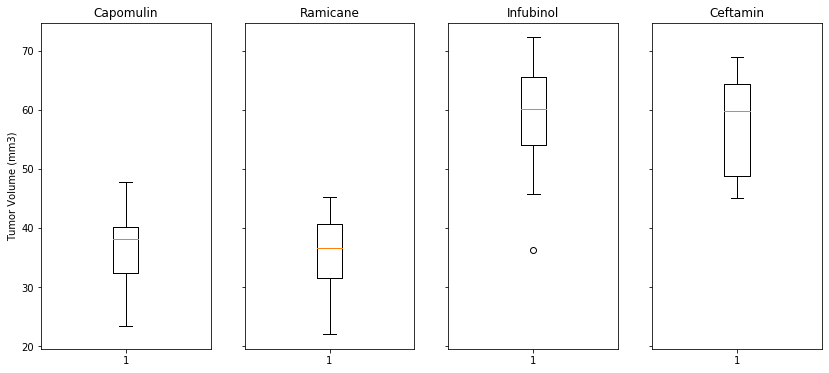

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax= plt.subplots(1,4, figsize=(14,6), sharey=True)

ax[0].boxplot(cap_df["Final Tumor Volume (mm3)"])
ax[0].set_title("Capomulin")
ax[0].set_ylabel("Tumor Volume (mm3)")

ax[1].boxplot(ram_df["Final Tumor Volume (mm3)"])
ax[1].set_title("Ramicane")

ax[2].boxplot(inf_df["Final Tumor Volume (mm3)"])
ax[2].set_title("Infubinol")

ax[3].boxplot(cef_df["Final Tumor Volume (mm3)"])
ax[3].set_title("Ceftamin")

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

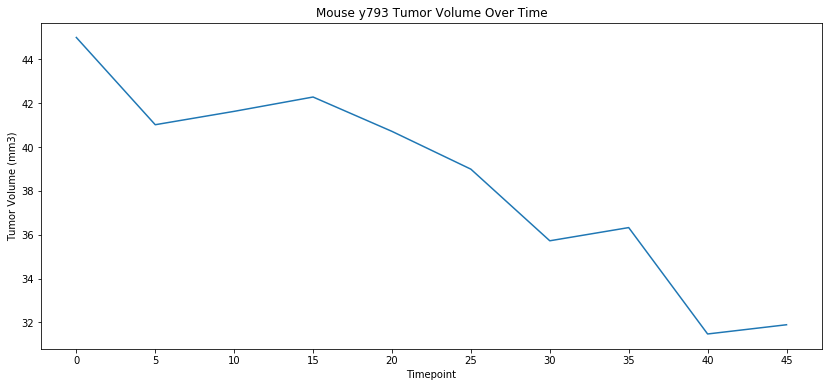

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_line=clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]== "Capomulin"]
cap_mouse_line= cap_line.loc[cap_line["Mouse ID"]== "y793"]
cap_mouse_line

x_axis= np.arange(len(cap_mouse_line["Timepoint"]))
tick_locations= [value for value in x_axis]
xlabels= cap_mouse_line["Timepoint"]

plt.figure(figsize=(14,6))
plt.plot(x_axis, cap_mouse_line["Tumor Volume (mm3)"])
plt.xticks(tick_locations, cap_mouse_line["Timepoint"], rotation=0)
plt.title("Mouse y793 Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Mouse Weight (g) vs Average Tumor Volume (mm3) for Capomulin Regimen')

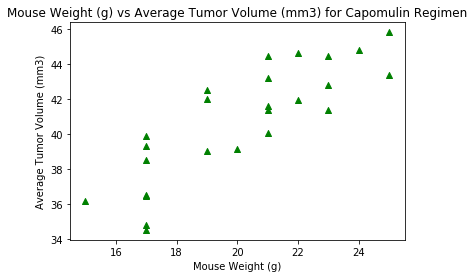

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight=cap_line.groupby("Mouse ID")["Weight (g)"].mean()
avg_tv= cap_line.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(weight, avg_tv, color="green", marker="^")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3) for Capomulin Regimen")

## Correlation and Regression

The Correlation Coefficient is 0.8419363424694717


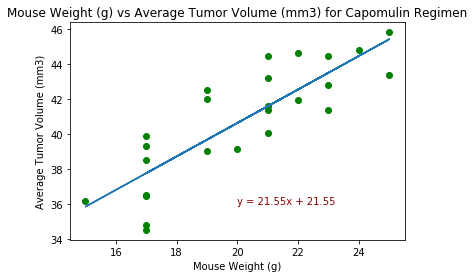

In [19]:
from scipy.stats import linregress

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
rvalue=st.pearsonr(weight, avg_tv)
rvalue
r_value=np.corrcoef(weight, avg_tv)
print( "The Correlation Coefficient is " + str(rvalue[0]))

plt.scatter(weight, avg_tv, color="g")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3) for Capomulin Regimen")


x_values= weight
y_values= avg_tv
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_values, regress_values)
plt.annotate(line_eq, (20,36), color="darkred")
plt.show()